## MIHĂILĂ IULIANA-RALUCA - Laborator 3 AM

## Fisiere XML

### De rezolvat
Plecand de la exemplele de mai sus, creati un fisier XML de adnotare pentru imaginea *adnotare2.jpeg*, stiind punctul de inceput (xmin, ymin), si punctul de final (xmax, ymax) al patratului care incadreaza obiectul.

In [20]:
import xml.etree.ElementTree as ET
import cv2

xmin = 593
ymin = 24
xmax = 689
ymax = 369

img = cv2.imread('adnotare2.jpeg')
img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color=(255, 0, 0), thickness=2)
img = cv2.putText(img, 'Door', (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
            
cv2.imshow("Imagine", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# TODO: Generare si scriere pe disc fisier XML

file_name = "adnotare2.xml"

root = ET.Element("annotation")

e1 = ET.Element("filename")
e1.text = "img"
root.append(e1)

e2 = ET.Element("size")
root.append(e2)

s1 = ET.SubElement(e2, "width")
s1.text = "1248"
s2 = ET.SubElement(e2, "height")
s2.text = "384"
s3 = ET.SubElement(e2, "depth")
s3.text = "3"

e3 = ET.Element("object")
root.append (e3)

s1 = ET.SubElement(e3, "name")
s1.text = "Door"

tree = ET.ElementTree(root)

with open(file_name, "wb") as files :
    tree.write(files)

## DOCX

### De rezolvat
Generati un fisier DOCX care sa contina:
 - un titlu
 - un tabel cu array-urile x si y (cu denumire intr-un paragraf inaintea tabelului)
 - o imagine cu graficul functiei y = x^2 + 10 (cu denumire intr-un paragraf inaintea imaginii), pe o pagina separata

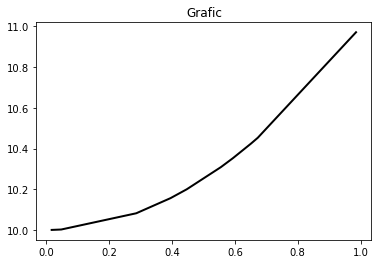

In [82]:
import docx
from docx.shared import Inches
import numpy as np
from matplotlib import pyplot as plt

document = docx.Document()

# Titlu document
document.add_heading('Aplicatii Multimedia Laborator 3 - Mihaila Iuliana Raluca', 0)

document.add_heading('Tabel valori', level=1)

tabel = document.add_table(rows=1, cols=2)
hdr_cells = tabel.rows[0].cells
hdr_cells[0].text = 'x'
hdr_cells[1].text = 'y'

# Generarea unui array aleator de 10 numere intre 0 si 1 si sortarea lor crescatoare
x = np.sort(np.random.rand(10))

# Definirea axei y ca o functie de x
y = x * x + 10

for i in range(10):
    celule_rand = tabel.add_row().cells
    celule_rand[0].text = str(x[i])
    celule_rand[1].text = str(y[i])

document.add_page_break()
document.add_heading('Graficul functiei y = x^2 + 10', level=1)

# Plotarea functiei
plt.plot(x, y, ls='solid', linewidth=2, color='black')

# Atribuirea unui titlu graficului
plt.title("Grafic")

# Salvarea graficului sub forma de imagine
plt.savefig("generated_plot.png")

document.add_picture("generated_plot.png")

document.save('output.docx')


## Fisiere PDF si CSV

### De rezolvat
Cititi valorile din fisierul CSV de la punctul anterior in 3 vectori/ liste (xr, yr si sumr).

Afisati o functie care sa aiba pe axa x vectorul xr, iar pe axa y vectorul yr si salvati o imagine cu acest grafic.

Generati un fisier PDF care sa contina:
 - un titlu
 - un tabel cu vectorii xr, yr, sumr (cu denumire intr-un paragraf inaintea tabelului)
 - imaginea cu graficul generat mai sus (cu denumire intr-un paragraf inaintea imaginii), pe o noua pagina

Xr este: ['xr', '0.3343920802893894', '0.3399384901491752', '0.3916549633856211', '0.5225335373029163', '0.5677603889832368', '0.5763810800655886', '0.6780269737636214', '0.737608807872466', '0.7617907270267508', '0.8806701728027432']
Yr este: ['yr', '0.0478252138220846', '0.1178116489789085', '0.20087526646220166', '0.2185521181730512', '0.5719314388272585', '0.6517009329304511', '0.7591814553043794', '0.7667361335424968', '0.7779508405948184', '0.8256313492760626']
Sumr este: ['sumr', '0.382217294111474', '0.4577501391280837', '0.5925302298478228', '0.7410856554759675', '1.1396918278104953', '1.2280820129960397', '1.4372084290680007', '1.5043449414149628', '1.539741567621569', '1.7063015220788058']


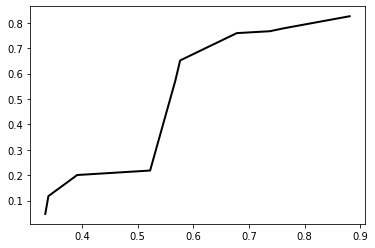

In [81]:
import fpdf
from fpdf import FPDF

# Crearea unui fisier CSV in Python
import csv
import numpy as np
from matplotlib import pyplot as plt

header = ['xr', 'yr', 'sumr']
x = np.sort(np.random.rand(10))
y = np.sort(np.random.rand(10))
suma = x + y

with open('Date.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # Scriere header
    writer.writerow(header)

    # Scriere date
    for i in range(0, len(x)):
        writer.writerow([x[i], y[i], suma[i]])

        
xr = []
yr = []
sumr = []

# Citirea fisierului CSV creat mai sus

with open('date.csv', newline='\n') as f:
    reader = csv.reader(f)
    for row in reader:
        xr.append(row[0])
        yr.append(row[1])
        sumr.append(row[2])

print(f"Xr este: {xr}")
print(f"Yr este: {yr}")
print(f"Sumr este: {sumr}")


data = []

for i in range(len(xr)):
    data.append((xr[i], yr[i], sumr[i]))

left_margin = 20
right_margin = 20
top_margin = 20

class FPDF_Class(FPDF, fpdf.HTMLMixin):
    pass

pdf = FPDF_Class()
pdf.set_margins(left=left_margin, top=top_margin, right=right_margin)

pdf.add_page()
# Setare font
pdf.set_font('Arial', 'B',size=18)
pdf.cell(0, 5, 'Aplicatii Multimedia Laborator 3 - Mihaila Iuliana Raluca', ln=1)
pdf.ln(20)
pdf.set_font('Arial', 'B',size=18)
pdf.cell(0, 5, 'Tabel', ln=1)
pdf.ln(10)
pdf.set_font("Times", 'B', size=18)

pdf.set_font("Times", size=12)
line_height = pdf.font_size * 2.5
col_width = pdf.epw / 4

for row in data:
    for i in row:
        pdf.multi_cell(col_width, line_height, i, border=1, ln=3, max_line_height=pdf.font_size)
    pdf.ln(line_height)
pdf.ln(5)

pdf.add_page()

pdf.set_font('Arial', 'B',size=18)
pdf.cell(0, 5, 'Grafic functie', ln=1)
plt.plot(x, y, ls='solid', linewidth=2, color='black')
plt.savefig("generated_plot_pdf.png")
pdf.image( "generated_plot_pdf.png", w=125)
pdf.ln(5)


pdf.output('output.pdf')
